In [9]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

N_SAMPLES = 10000

# Questão 1

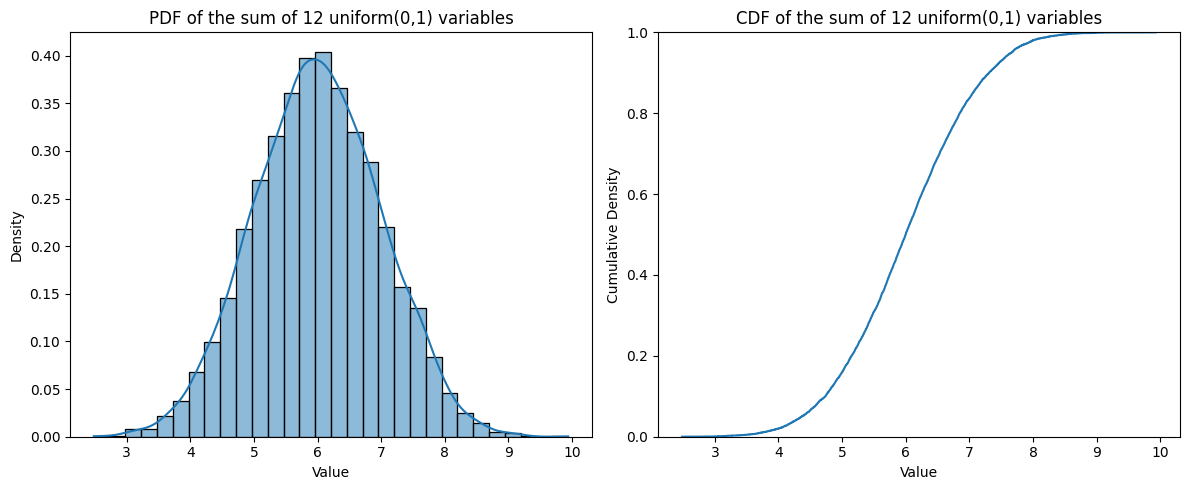

In [38]:
# Parameters
n = 12

means, stds, second_moments = [], [], []
# Generate samples
X = np.zeros((1, N_SAMPLES))
for i in range(n):
    X += np.random.uniform(0, 1, (1, N_SAMPLES))
    means.append(np.mean(X))
    stds.append(np.std(X))
    second_moments.append(np.mean(X**2))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(X[0], stat='density', bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'PDF of the sum of {n} uniform(0,1) variables')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.ecdfplot(X[0], ax=axes[1])
axes[1].set_title(f'CDF of the sum of {n} uniform(0,1) variables')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Cumulative Density')

plt.tight_layout()
plt.show()

In [40]:
# Print the means, variances and second moments for all possible n values from 0 to 12
for i in range(n):
    print(f"n = {i + 1} | E[X] = {means[i]} | Var[X] = {stds[i]} | E[X^2] = {second_moments[i]}")

n = 1 | E[X] = 0.5028475592795225 | Var[X] = 0.2904900638046342 | E[X^2] = 0.3372401450425933
n = 2 | E[X] = 1.0015473384565723 | Var[X] = 0.4077975626039931 | E[X^2] = 1.1693959232352016
n = 3 | E[X] = 1.4994610983700385 | Var[X] = 0.5041713151148474 | E[X^2] = 2.5025723005097165
n = 4 | E[X] = 1.9977523089622424 | Var[X] = 0.5752977153203372 | E[X^2] = 4.321981749216769
n = 5 | E[X] = 2.500458281615456 | Var[X] = 0.6387496117323491 | E[X^2] = 6.660292684587545
n = 6 | E[X] = 3.0036876424053314 | Var[X] = 0.7007061840581457 | E[X^2] = 9.513128609515826
n = 7 | E[X] = 3.5035916408361767 | Var[X] = 0.756173691991865 | E[X^2] = 12.846953038197741
n = 8 | E[X] = 4.005070767935925 | Var[X] = 0.8091813707574356 | E[X^2] = 16.69536634695575
n = 9 | E[X] = 4.507408453423398 | Var[X] = 0.8609338889690119 | E[X^2] = 21.057938127168022
n = 10 | E[X] = 5.005951756084889 | Var[X] = 0.9145613815292611 | E[X^2] = 25.895975504834094
n = 11 | E[X] = 5.503521718910587 | Var[X] = 0.9585904443348867 | E[

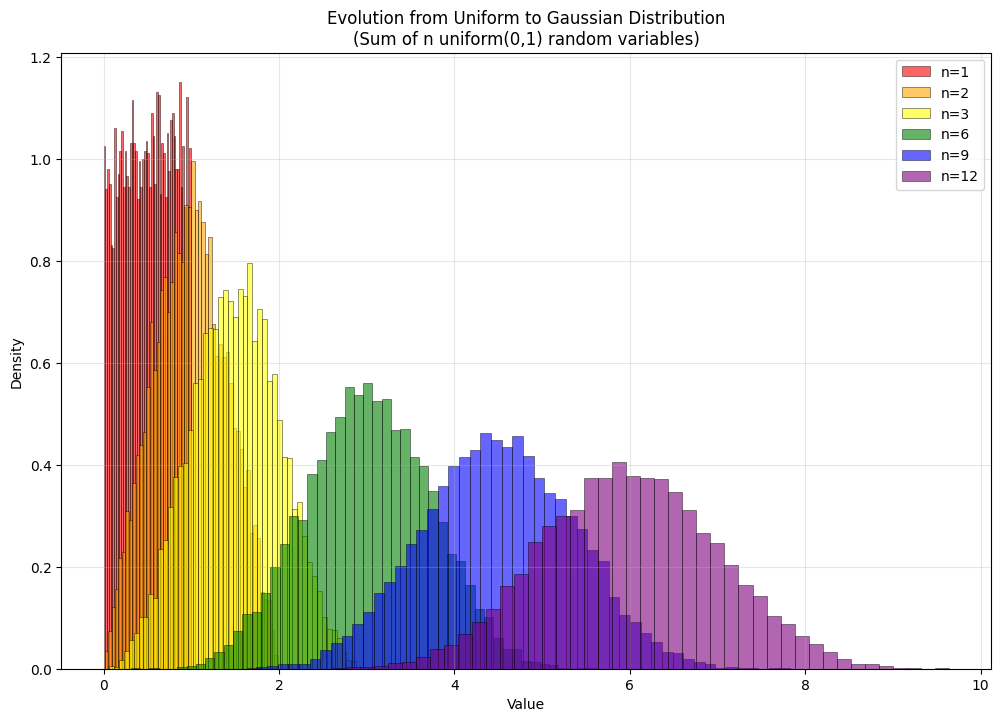

In [8]:
# Alternative visualization: Overlaid distributions
plt.figure(figsize=(12, 8))

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n_values = [1, 2, 3, 6, 9, 12]

for i, n in enumerate(n_values):
    # Generate samples
    X = np.zeros(N_SAMPLES)
    for j in range(n):
        X += np.random.uniform(0, 1, N_SAMPLES)
    
    # Plot histogram with transparency
    plt.hist(X, bins=50, alpha=0.6, density=True, color=colors[i], 
             label=f'n={n}', edgecolor='black', linewidth=0.5)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Evolution from Uniform to Gaussian Distribution\n(Sum of n uniform(0,1) random variables)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

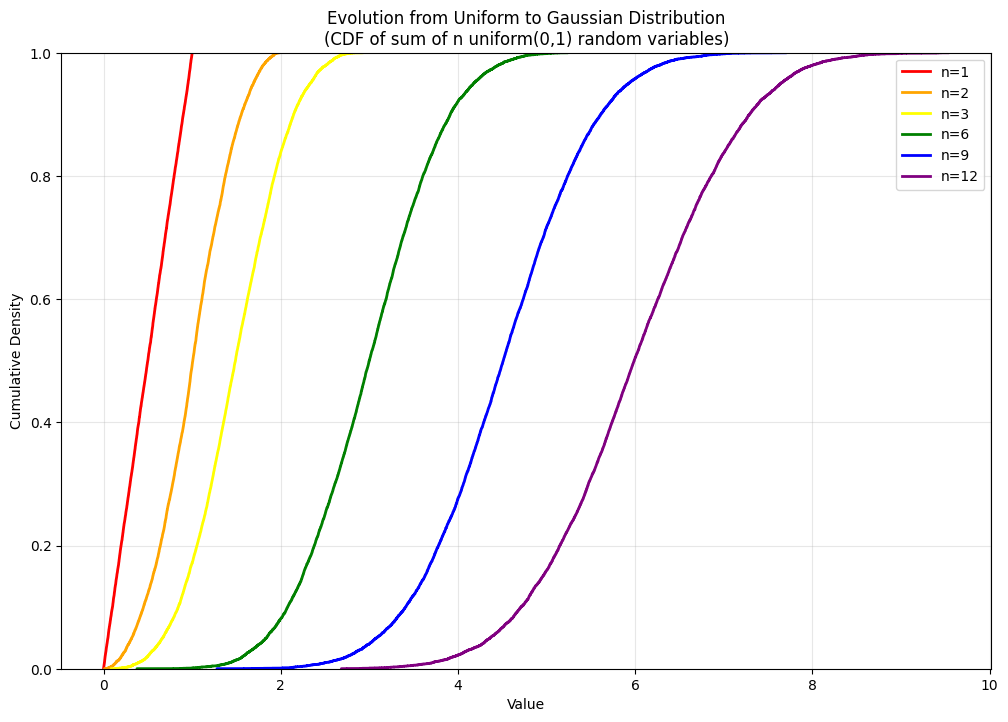

In [10]:
# Alternative visualization: Overlaid CDFs for different n
plt.figure(figsize=(12, 8))

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n_values = [1, 2, 3, 6, 9, 12]

for i, n in enumerate(n_values):
    # Generate samples
    X = np.zeros(N_SAMPLES)
    for j in range(n):
        X += np.random.uniform(0, 1, N_SAMPLES)
    # Plot ECDF with transparency
    sns.ecdfplot(X, label=f'n={n}', color=colors[i], linewidth=2)

plt.xlabel('Value')
plt.ylabel('Cumulative Density')
plt.title('Evolution from Uniform to Gaussian Distribution\n(CDF of sum of n uniform(0,1) random variables)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Questão 3

A PDF é definida como:
\begin{cases}
f_X(x) = \lambda e^{-\lambda x}, & x \ge 0 \\
0, & x < 0
\end{cases}

Integrando, obtemos a CDF, cuja saída segue uma distribuição uniforme:
\begin{align*}
u = F_X(x) = 1 - e^{-\lambda x}, \quad 0 \le u < 1
\end{align*}

Desenvolvendo a equação, obtemos a CDF inversa
\begin{align*}
u &= 1 - e^{-\lambda x} \\
e^{-\lambda x} &= 1 - u \\
-\lambda x &= \ln(1 - u) \\
x &= -\frac{1}{\lambda} \ln(1 - u)
\end{align*}

\begin{align*}
X = F_X^{-1}(U) = -\frac{1}{\lambda} \ln(1-U)
\end{align*}


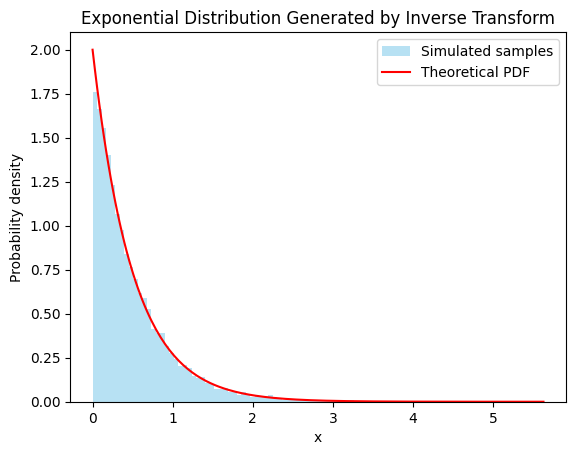

In [12]:
# Exponential parameter
lmbda = 2.0  

# Generate uniform U(0,1) random numbers
U = np.random.rand(N_SAMPLES)

# Apply the inverse transform
X = -np.log(1 - U) / lmbda

# Plot histogram and theoretical PDF
plt.hist(X, bins=100, density=True, alpha=0.6, color='skyblue', label='Simulated samples')

# Theoretical curve
x_vals = np.linspace(0, max(X), 200)
pdf = lmbda * np.exp(-lmbda * x_vals)
plt.plot(x_vals, pdf, 'r-', label='Theoretical PDF')

plt.title("Exponential Distribution Generated by Inverse Transform")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()
plt.show()


# Questão 4

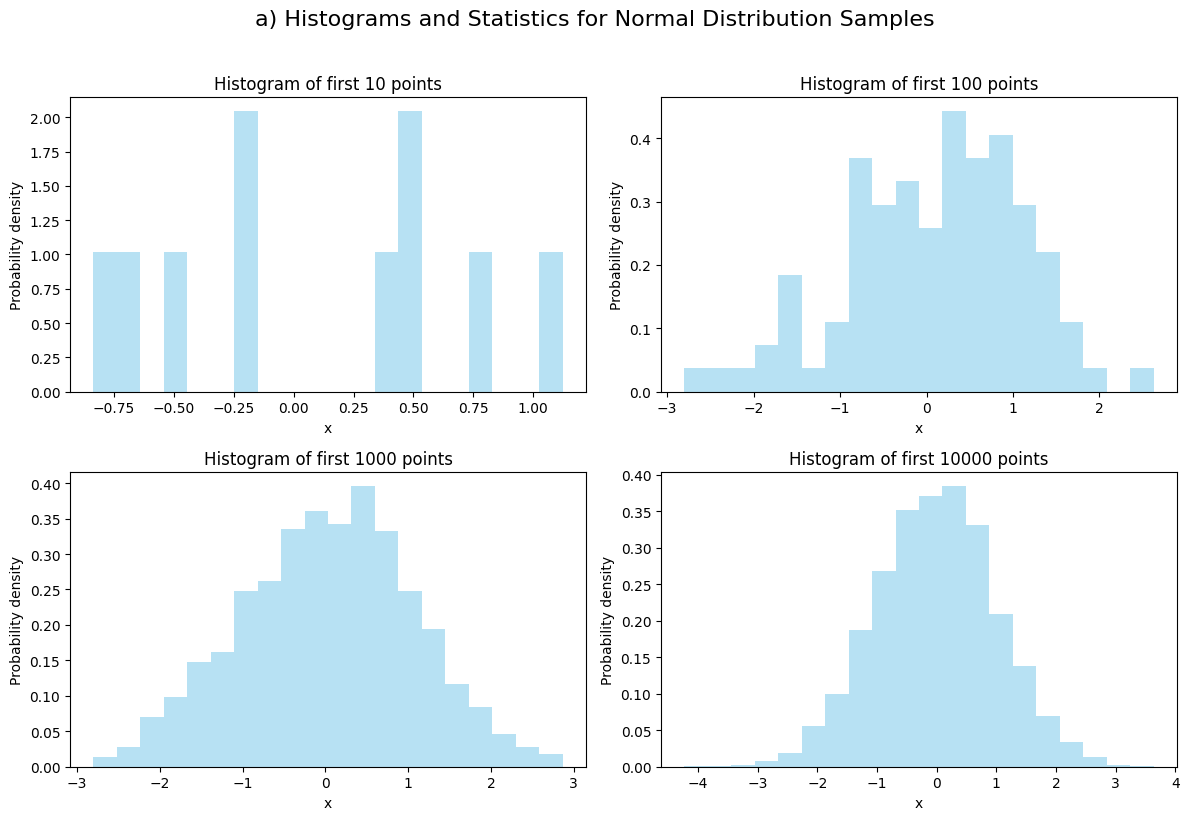

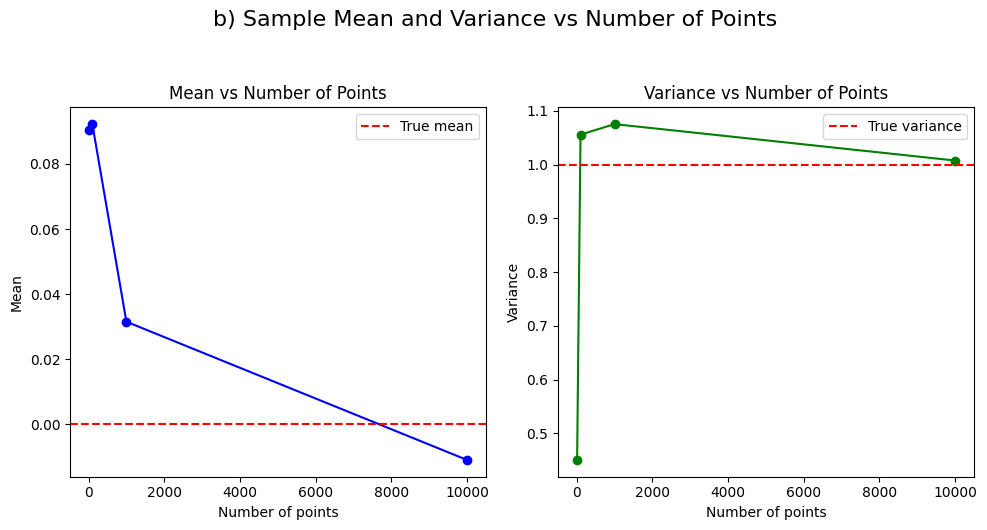

In [ ]:
# Parameters
mean, std = 0, 1

# Generate N points from a normal distribution
X = np.random.normal(mean, std, N_SAMPLES)

# Different sample sizes to analyze
sample_sizes = [10, 100, 1000, 10000]

# Part (a): Plot histograms
plt.figure(figsize=(12, 8))
plt.suptitle('a) Histograms and Statistics for Normal Distribution Samples', fontsize=16, y=1.02)
for i, n in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)
    plt.hist(X[:n], bins=20, density=True, alpha=0.6, color='skyblue')
    plt.title(f'Histogram of first {n} points')
    plt.xlabel('x')
    plt.ylabel('Probability density')
plt.tight_layout()
plt.show()

# Part (b): Calculate mean and variance
means = [np.mean(X[:n]) for n in sample_sizes]
variances = [np.var(X[:n], ddof=1) for n in sample_sizes]  # sample variance

# Plot mean and variance as a function of number of points
plt.figure(figsize=(10,5))
plt.suptitle('b) Sample Mean and Variance vs Number of Points', fontsize=16, y=1.05)

plt.subplot(1,2,1)
plt.plot(sample_sizes, means, 'o-', color='blue')
plt.axhline(mean, color='red', linestyle='--', label='True mean')
plt.title('Mean vs Number of Points')
plt.xlabel('Number of points')
plt.ylabel('Mean')
plt.legend()

plt.subplot(1,2,2)
plt.plot(sample_sizes, variances, 'o-', color='green')
plt.axhline(std**2, color='red', linestyle='--', label='True variance')
plt.title('Variance vs Number of Points')
plt.xlabel('Number of points')
plt.ylabel('Variance')
plt.legend()

plt.tight_layout()
plt.show()

# Questão 5

\begin{align*}
&X, Y \sim \mathcal{N}(0,1), \quad \text{independentes} \\[2mm]
&Z = aX + bY + C \\[1mm]
\end{align*}

Conhecemos os valores esperados de X e Y, e Z pode ser deduzido a partir linearidade das esperanças:

\begin{align*}
&\quad \mathbb{E}[X] = 0, \quad \mathbb{E}[Y] = 0 \\ 
&\quad \mathbb{E}[Z] = \mathbb{E}[aX + bY + C] = a \mathbb{E}[X] + b \mathbb{E}[Y] + C = C = \{0, 5\} \\[1mm]
\end{align*}

X e Y são independentes. Cov(X, Z) pode ser decomposto em termos das covariâncias entre X e cada variável membro de Z:

\begin{align*}
&\quad \text{Cov}(X,Y) = 0 \quad (\text{independência}) \\
&\quad \text{Cov}(X,Z) = \text{Cov}(X, aX + bY + C) = a \text{Var}(X) + b \text{Cov}(X,Y) + 0 = a = 1 \\[1mm]
\end{align*}

Como as variancias de X e Z são conhecidas e as variáveis são independentes, torna-se possível deduzir Var(Z):

\begin{align*}
&\quad \text{Var}(Z) = \text{Var}(aX + bY + C) = \text{Var}(aX) + \text{Var}(bY) + 2\,\text{Cov}(aX,bY) = a^2 + b^2 \\
&\quad \text{Var}(Z) = a^2 \text{Var}(X) + b^2 \text{Var}(Y) + 2ab\,\text{Cov}(X,Y) = a^2 \text{Var}(X) + b^2 \text{Var}(Y) = a^2 + b^2 = b^2
\end{align*}


C = 0
b = -10
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.926, theoretical: 1
E[Z] sample: 0.166, theoretical: 0
Var(Z) sample: 100.808, theoretical: 101
b = -1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.985, theoretical: 1
E[Z] sample: 0.010, theoretical: 0
Var(Z) sample: 1.978, theoretical: 2
b = -0.1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.991, theoretical: 1
E[Z] sample: -0.006, theoretical: 0
Var(Z) sample: 1.001, theoretical: 1.01
b = 0
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.992, theoretical: 1
E[Z] sample: -0.008, theoretical: 0
Var(Z) sample: 0.992, theoretical: 1
b = 0.1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.993, theoretical: 1
E[Z] sample: -0.009, theoretical: 0
Var(Z) sample: 1.003, theoretical: 1.01
b = 1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.999, theoretical: 1
E[Z] sample: -0.025, theoretical: 0
Var(Z) sample: 2.005, theoretical: 2
b = 10
Cov(X,Y) sample: 0.007, theo

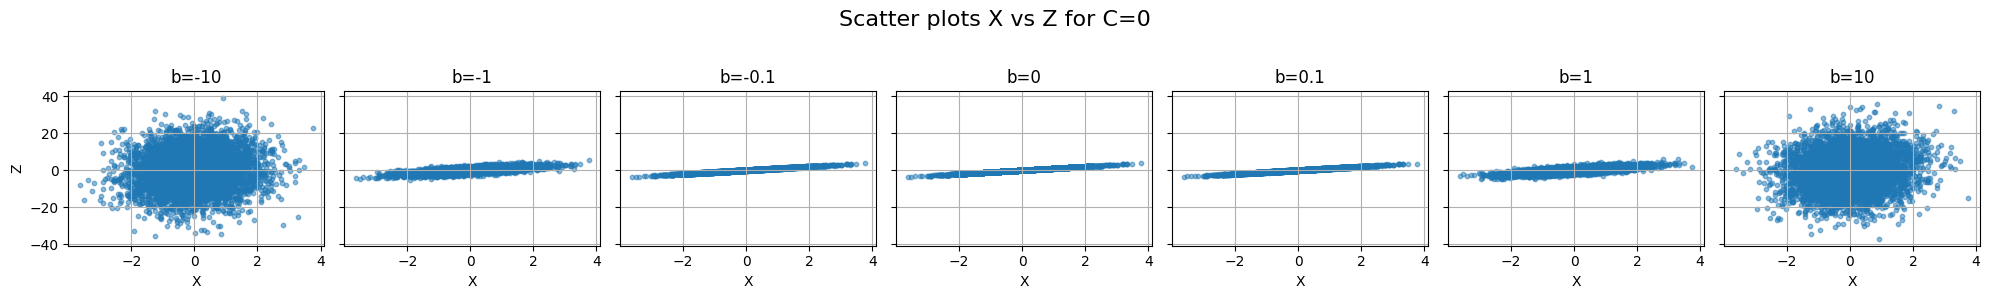


C = 5
b = -10
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.926, theoretical: 1
E[Z] sample: 5.166, theoretical: 5
Var(Z) sample: 100.808, theoretical: 101
b = -1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.985, theoretical: 1
E[Z] sample: 5.010, theoretical: 5
Var(Z) sample: 1.978, theoretical: 2
b = -0.1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.991, theoretical: 1
E[Z] sample: 4.994, theoretical: 5
Var(Z) sample: 1.001, theoretical: 1.01
b = 0
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.992, theoretical: 1
E[Z] sample: 4.992, theoretical: 5
Var(Z) sample: 0.992, theoretical: 1
b = 0.1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.993, theoretical: 1
E[Z] sample: 4.991, theoretical: 5
Var(Z) sample: 1.003, theoretical: 1.01
b = 1
Cov(X,Y) sample: 0.007, theoretical: 0
Cov(X,Z) sample: 0.999, theoretical: 1
E[Z] sample: 4.975, theoretical: 5
Var(Z) sample: 2.005, theoretical: 2
b = 10
Cov(X,Y) sample: 0.007, theoreti

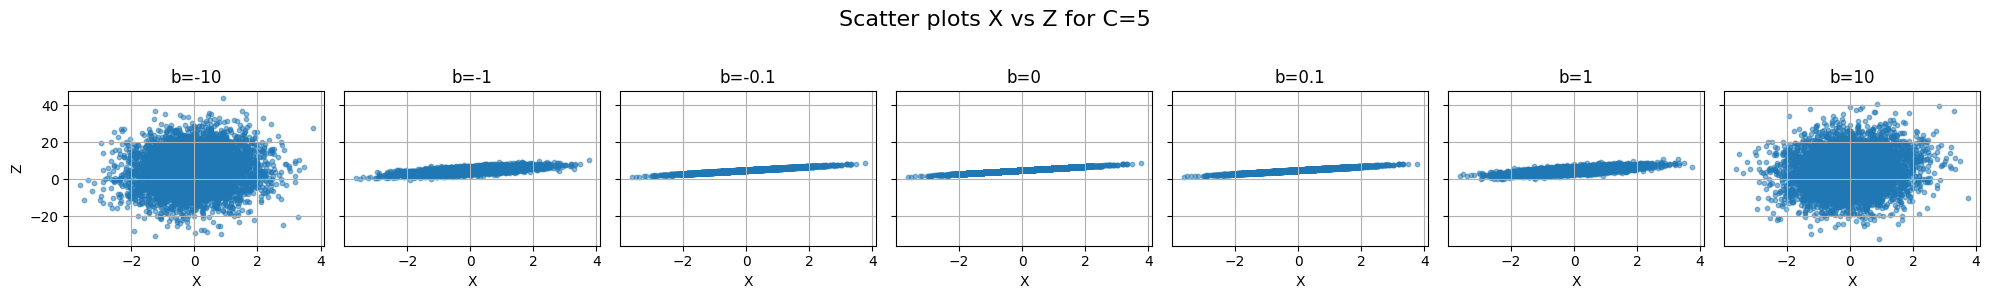

In [36]:
# Parameters
n_samples = int(N_SAMPLES / 2)

a = 1
b_values = [-10, -1, -0.1, 0, 0.1, 1, 10]
C_values = [0, 5]

expected_X = expected_Y = 0
std_X = std_Y = 1

# Generate independent normal variables X and Y
X = np.random.normal(expected_X, std_X, n_samples)
Y = np.random.normal(expected_Y, std_Y, n_samples)

# Theoretical values
cov_XY_th = 0
cov_XZ_th = a
expected_Z_th = lambda c: c
var_Z_th = lambda b: a**2 + b**2

for C in C_values:
    print(f"\nC = {C}")
    
    fig, axes = plt.subplots(1, len(b_values), figsize=(20,3), sharey=True)
    fig.suptitle(f"Scatter plots X vs Z for C={C}", fontsize=16)
    
    for i, b in enumerate(b_values):
        # Compute Z
        Z = a*X + b*Y + C
        
        # Sample statistics
        cov_XY = np.cov(X, Y)[0,1]
        cov_XZ = np.cov(X, Z)[0,1]
        E_Z = np.mean(Z)
        Var_Z = np.var(Z, ddof=1)
        
        # Print results
        print(f"b = {b}")
        print(f"Cov(X,Y) sample: {cov_XY:.3f}, theoretical: {cov_XY_th}")
        print(f"Cov(X,Z) sample: {cov_XZ:.3f}, theoretical: {cov_XZ_th}")
        print(f"E[Z] sample: {E_Z:.3f}, theoretical: {expected_Z_th(C)}")
        print(f"Var(Z) sample: {Var_Z:.3f}, theoretical: {var_Z_th(b)}")
        
        # Scatter plot in subplot
        axes[i].scatter(X, Z, alpha=0.5, s=10)
        axes[i].set_title(f"b={b}")
        axes[i].set_xlabel("X")
        if i == 0:
            axes[i].set_ylabel("Z")
        axes[i].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
